# Working with Grouped Data

Cases often belong to distinct groups that we want to compare with each other in some way. 

Let's load the countries data once again:

In [1]:
import pandas as pd

In [2]:
countries = pd.read_excel("data_geographies_v1.xlsx", sheet_name = "list-of-countries-etc")
countries.head()

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,1946-11-19,South Asia,Low income
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,1955-12-14,Europe & Central Asia,Upper middle income
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,1962-10-08,Middle East & North Africa,Upper middle income
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,1993-07-28,Europe & Central Asia,High income
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1976-12-01,Sub-Saharan Africa,Lower middle income


Imagine you are investigating how latitude affects skin cancer risk. Here's the overall distribution of latitudes for all countries:

In [1]:
import matplotlib.pyplot as plt

plt.hist(countries['Latitude'])
plt.show()

NameError: name 'countries' is not defined

You might want to summarise data collected from different regions. We can easily visualise the distributions of latitude for different subgroups of countries using a box plot:

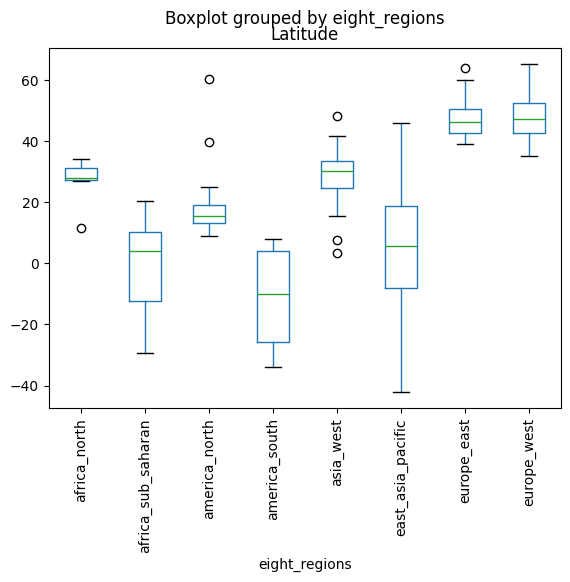

In [4]:
countries.boxplot('Latitude', by='eight_regions', grid=False, rot=90 )
plt.show()

The boxplot shows the median latitude for each group of countries.
How can we get hold of these values?

### `groupby()`

Pandas allows you to define groups of rows and construct summary statistics for each group:

In [5]:
grouped = countries.groupby("eight_regions")

In [6]:
grouped['Latitude'].median()

eight_regions
africa_north          28.000000
africa_sub_saharan     3.850000
america_north         15.500000
america_south        -10.000000
asia_west             30.000000
east_asia_pacific      5.712000
europe_east           46.041665
europe_west           47.166670
Name: Latitude, dtype: float64

#### Exercise


Find means and standard deviations of **petal_length** for the three different species of iris in the file *iris.csv*.

In [5]:
import pandas as pd

iris = pd.read_csv("iris.csv")
iris.head()

grouped = iris.groupby("species")
# grouped['petal_length'].[mean(),std()]
grouped['petal_length'].agg(['mean', 'std'])

,mean,std
species,,
Iris-setosa,1.464,0.173511
Iris-versicolor,4.260,0.469911
Iris-virginica,5.552,0.551895


Plot the total global CO2 emissions for each year.


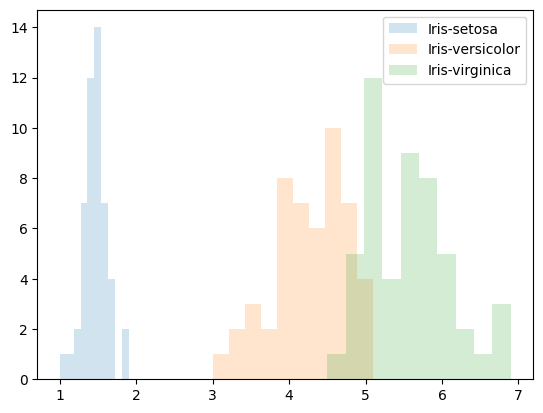

In [16]:
plt.hist(iris.query('species == "Iris-setosa"')['petal_length'], label='Iris-setosa',alpha=0.2)
plt.hist(iris.query('species == "Iris-versicolor"')['petal_length'], label='Iris-versicolor',alpha=0.2)
plt.hist(iris.query('species == "Iris-virginica"')['petal_length'], label='Iris-virginica',alpha=0.2)
plt.xlabel='Petal Length'
plt.ylabel='Frequency'
plt.legend()
plt.show()

***